<div class="usecase-title">Job Forecasting</div>

<div class="usecase-authors"><b>Authored by: </b>Bao Ngo</div>

<div class="usecase-date"><b>Date: </b> March 2023</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill"></div>
    <div class="usecase-level"><b> Level: </b>Intermediate</div>
    <div class="usecase-skill"><b> Pre-requisite Skills: </b>Python </div>

<div class="usecase-section-header">Scenario</div>

### Jobs Forecasting and Current Industry Jobs in Melbourne

#### 1. Introduction:
The aim of this proposal is to leverage available datasets to create a comprehensive analysis of jobs forecasting and current industry jobs in Melbourne. By utilizing various datasets provided by the City of Melbourne, we aim to develop insights into the changing landscape of jobs in the city, identify trends, and provide valuable information for businesses, policymakers, and stakeholders.

#### 2. Objectives:

Analyze the City of Melbourne Jobs Forecasts by Small Area 2021-2041 dataset to understand the projected job growth trends.
Utilize data on jobs per space use for blocks to assess current industry distribution and identify emerging sectors.
Analyze business establishments and jobs data by business size and industry to understand the composition of the job market.
Utilize jobs per CLUE industry for blocks to map industry-specific job trends and changes over time.
#### 3. Methodology:

Data Collection: Gather datasets provided by the City of Melbourne, including Jobs Forecasts, Jobs per space use for blocks, Business establishments and jobs data, and Jobs per CLUE industry for blocks.
Data Cleaning and Preparation: Clean and preprocess the datasets to ensure consistency and accuracy.
Data Analysis: Perform statistical analysis, data visualization, and trend analysis to identify patterns, forecast job trends, and map industry changes.
Reporting: Generate reports, visualizations, and insights to present findings to stakeholders.

#### 4. Proposed Deliverables:
Comprehensive analysis report on job forecasting trends in Melbourne.
Visualizations depicting projected job growth areas and declining sectors.
Industry-wise analysis of current job distribution and emerging sectors.
Recommendations for businesses and policymakers based on the analysis.

#### 5. Timeline:
Data Collection and Cleaning: 2 weeks
Data Analysis and Visualization: 3 weeks
Report Writing and Presentation: 1 week

#### 6. Benefits:

Insights for Decision Making: The analysis will provide valuable insights for businesses, policymakers, and stakeholders to make informed decisions regarding workforce planning, investment, and policy development.
Industry Mapping: Mapping industry-specific job trends will help identify areas of growth and potential challenges, aiding in strategic planning.
Forecasting: The jobs forecasting analysis will assist in understanding future workforce demands and opportunities for job creation.
Economic Development: By understanding the current state and future trajectory of jobs, initiatives can be tailored to promote economic growth and sustainability.



In [1]:
###################################################################
# Libraries used:
###################################################################
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import math
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Dependencies
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import io
pd.set_option('display.max_columns', None)

In [2]:
# Function to collect datasets using API
from io import StringIO

def datasetcollect(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = " "
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Dataset 1: Job Forecasting by Small Area 2020-2024

In [3]:
dataset_id = 'city-of-melbourne-jobs-forecasts-by-small-area-2020-2040'
job_forecast = datasetcollect(dataset_id)
print(len(job_forecast))

9114


In [4]:
job_forecast.head()

,geography,year,category,industry_space_use,value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529


In [5]:
job_forecast.value_counts()

geography                     year  category           industry_space_use           value
Carlton                       2021  Jobs by industry   Accommodation                743      1
Port Melbourne                2028  Jobs by industry   Agriculture and mining       6        1
                              2027  Jobs by space use  Office                       8701     1
                                                       Other - Employment           109      1
                                                       Retail                       200      1
                                                                                            ..
Kensington                    2034  Jobs by space use  Health                       818      1
                                                       Entertainment - Other        3099     1
                                                       Entertainment - Hospitality  455      1
                                                       

In [6]:
job_forecast.describe()

,year,value
count,9114.000000,9114.000000
mean,2031.000000,10474.800307
std,6.055633,48155.637112
min,2021.000000,0.000000
25%,2026.000000,108.000000
50%,2031.000000,688.000000
75%,2036.000000,3995.500000
max,2041.000000,659244.000000


In [7]:
# Trend analysis
print("\nTrend Analysis:")
# Overall trend of job forecasts over the years
yearly_totals = job_forecast.groupby('year')['value'].sum()
print(yearly_totals)

# Industry analysis
print("\nIndustry Analysis:")
# Group data by 'industry_space_use' and calculate total jobs per industry
industry_totals = job_forecast.groupby('industry_space_use')['value'].sum()
print(industry_totals)


Trend Analysis:
year
2021    3728033
2022    3788107
2023    3868688
2024    3961202
2025    4061051
2026    4156606
2027    4244724
2028    4332885
2029    4419879
2030    4508396
2031    4596611
2032    4672871
2033    4743376
2034    4813150
2035    4884455
2036    4955206
2037    5018811
2038    5082656
2039    5146170
2040    5210489
2041    5273964
Name: value, dtype: int64

Industry Analysis:
industry_space_use
Accommodation                                   526554
Accommodation - Commercial                      446056
Admin and support services                      828520
Agriculture and mining                          126107
Arts and recreation services                   1247653
Business services                              4343624
Construction                                    344829
Education                                      1429809
Education and training                         1501266
Electricity, gas, water and waste services      494206
Entertainment - Hospitality

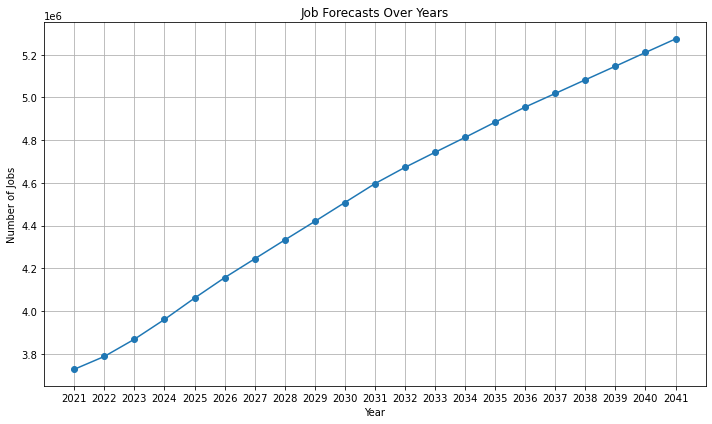

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Job Forecasts Over Years')
plt.grid(True)
plt.xticks(yearly_totals.index)
plt.tight_layout()
plt.show()

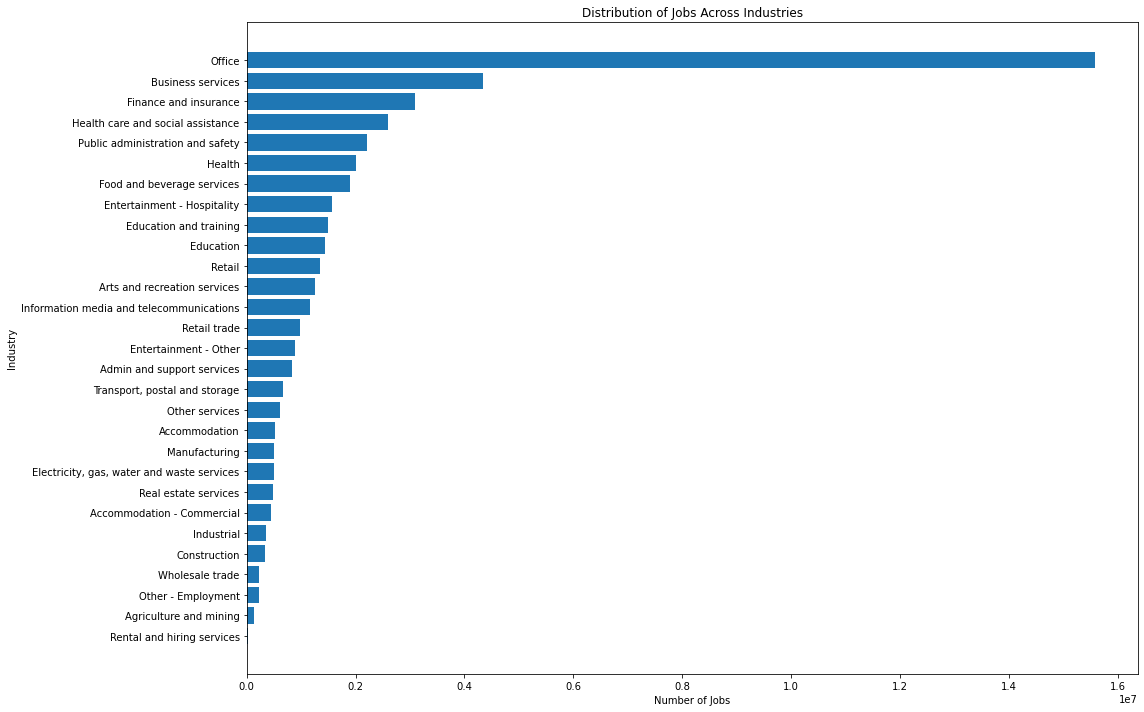

In [9]:
# Exclude 'Total jobs' from industry_totals
industry_totals_filtered = industry_totals.drop('Total jobs')

# Industry Analysis Visualization (Horizontal Bar Chart)
plt.figure(figsize=(16, 10))  # Adjust figure size for horizontal chart
industry_totals_filtered_sorted = industry_totals_filtered.sort_values()  # Sort industries by total jobs (ascending for horizontal chart)
plt.barh(industry_totals_filtered_sorted.index, industry_totals_filtered_sorted.values)
plt.xlabel('Number of Jobs')
plt.ylabel('Industry')
plt.title('Distribution of Jobs Across Industries')
plt.tight_layout()
plt.show()

### Dataset 2: Jobs per space use for blocks

In [10]:
dataset_id_2 = 'employment-by-block-by-space-use'
emp_space = datasetcollect(dataset_id_2)
print(len(emp_space))

12394


In [11]:
emp_space.head()

,census_year,block_id,clue_small_area,commercial_accommodation,common_area,community_use,educational_research,entertainment_recreation_indoor,equipment_installation,hospital_clinic,house_townhouse,institutional_accommodation,manufacturing,office,park_reserve,parking_commercial_covered,parking_commercial_uncovered,parking_private_covered,parking_private_uncovered,performances_conferences_ceremonies,private_outdoor_space,public_display_area,residential_apartment,retail_cars,retail_shop,retail_showroom,retail_stall,sports_and_recreation_outdoor,square_promenade,storage,student_accommodation,transport,transport_storage_uncovered,unoccupied_under_construction,unoccupied_under_demolition_condemned,unoccupied_under_renovation,unoccupied_undeveloped_site,unoccupied_unused,wholesale,workshop_studio,total_jobs_in_block
0,2022,1,Melbourne (CBD),0.0,0.0,0.0,0.0,28.0,NaN,0.0,0.0,0.0,0.0,295.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,32.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0
1,2022,2,Melbourne (CBD),0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0
2,2022,11,Melbourne (CBD),165.0,0.0,0.0,0.0,166.0,NaN,0.0,0.0,NaN,0.0,346.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,41.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,759.0
3,2022,16,Melbourne (CBD),NaN,0.0,0.0,NaN,484.0,0.0,NaN,0.0,0.0,0.0,1647.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,62.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2404.0
4,2022,18,Melbourne (CBD),NaN,0.0,0.0,0.0,195.0,0.0,0.0,0.0,0.0,0.0,5907.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,12.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,6148.0


In [12]:
emp_space.describe()

,census_year,block_id,commercial_accommodation,common_area,community_use,educational_research,entertainment_recreation_indoor,equipment_installation,hospital_clinic,house_townhouse,institutional_accommodation,manufacturing,office,park_reserve,parking_commercial_covered,parking_commercial_uncovered,parking_private_covered,parking_private_uncovered,performances_conferences_ceremonies,private_outdoor_space,public_display_area,residential_apartment,retail_cars,retail_shop,retail_showroom,retail_stall,sports_and_recreation_outdoor,square_promenade,storage,student_accommodation,transport,transport_storage_uncovered,unoccupied_under_construction,unoccupied_under_demolition_condemned,unoccupied_under_renovation,unoccupied_undeveloped_site,unoccupied_unused,wholesale,workshop_studio,total_jobs_in_block
count,12394.000000,12394.000000,10158.000000,9425.0,11515.000000,9805.000000,9855.000000,9272.000000,10615.000000,11487.000000,11893.000000,11431.000000,10330.000000,10114.000000,10547.000000,11873.000000,9529.000000,11081.000000,10285.000000,10143.000000,11757.000000,9352.000000,12075.000000,10310.000000,11337.000000,11854.000000,11979.000000,12161.0,9688.000000,11486.000000,12082.000000,12201.000000,11162.0,12080.0,10849.000000,10711.0,9979.000000,11361.000000,10049.000000,11754.000000
mean,2012.209940,623.732774,19.547450,0.0,2.561094,78.762672,140.927042,0.701575,99.320772,0.010447,2.907425,12.836935,1063.751500,0.118647,0.770077,0.073697,0.095813,0.005234,11.562081,0.003155,3.270732,0.032720,1.010766,90.914064,0.946370,4.143327,10.122297,0.0,6.861168,2.085060,1.554296,11.219982,0.0,0.0,0.020371,0.0,0.042489,9.100079,12.207085,1495.986983
std,5.995895,597.590420,346.929011,0.0,57.436426,1138.463344,1638.642131,12.482849,1429.224656,0.674060,67.803167,221.462946,12158.828522,2.915393,17.290869,1.960366,2.822512,0.218234,210.500065,0.158845,73.881263,0.928982,22.334152,1046.813019,20.272873,63.405303,214.109778,0.0,87.385003,39.408129,31.922142,154.778442,0.0,0.0,0.736137,0.0,0.950255,161.022658,181.027433,17905.808456
min,2002.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,259.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,10.000000
50%,2012.000000,509.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,98.000000
75%,2017.000000,783.000000,0.000000,0.0,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,579.750000
max,2022.000000,2548.000000,9366.000000,0.0,1843.000000,27197.000000,43889.000000,362.000000,37815.000000,51.000000,2256.000000,7208.000000,326171.000000,112.000000,638.000000,81.000000,126.000000,11.000000,5428.000000,8.000000,2087.000000,57.000000,655.000000,27039.000000,576.000000,1389.000000,8091.000000,0.0,2579.000000,1353.000000,1150.000000,4569.000000,0.0,0.0,54.000000,0.0,61.000000,4481.000000,4735.000000,498282.000000


In [13]:
emp_space.value_counts

<bound method DataFrame.value_counts of        census_year  block_id  clue_small_area  commercial_accommodation  \
0             2022         1  Melbourne (CBD)                       0.0   
1             2022         2  Melbourne (CBD)                       0.0   
2             2022        11  Melbourne (CBD)                     165.0   
3             2022        16  Melbourne (CBD)                       NaN   
4             2022        18  Melbourne (CBD)                       NaN   
...            ...       ...              ...                       ...   
12389         2006       560       Kensington                       0.0   
12390         2006       566       Kensington                       0.0   
12391         2006       567       Kensington                       0.0   
12392         2006       569       Kensington                       0.0   
12393         2006       571       Kensington                       0.0   

       common_area  community_use  educational_research  \


### Dataset 3: Business establishments and jobs data by business size and industry

In [14]:
dataset_id_3 = 'business-establishments-and-jobs-data-by-business-size-and-industry'
buss_est = datasetcollect(dataset_id_3)
print(len(buss_est))

14692


In [15]:
buss_est.head()

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,2015,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,2015,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


In [16]:
buss_est.describe()

,census_year,total_establishments,total_jobs
count,14692.000000,14692.000000,10365.000000
mean,2012.155799,64.711135,2458.545586
std,6.016973,485.857098,12828.616392
min,2002.000000,1.000000,0.000000
25%,2007.000000,2.000000,39.000000
50%,2012.000000,6.000000,190.000000
75%,2017.000000,18.000000,890.000000
max,2022.000000,12870.000000,273200.000000


In [17]:
buss_est.count()

census_year             14692
clue_small_area         14692
anzsic_indusrty         14692
clue_industry           14692
business_size           14692
total_establishments    14692
total_jobs              10365
dtype: int64

In [18]:
# Data Cleaning and Preparation
# Check for missing values
missing_values = buss_est.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 census_year                0
clue_small_area            0
anzsic_indusrty            0
clue_industry              0
business_size              0
total_establishments       0
total_jobs              4327
dtype: int64


In [19]:
# Descriptive Analysis
summary_stats = buss_est.groupby('clue_industry')[['total_establishments', 'total_jobs']].sum()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                                             total_establishments  total_jobs
clue_industry                                                               
Accommodation                                              11048    353380.0
Admin and Support Services                                 27360    542547.0
Agriculture and Mining                                      2630    101691.0
All CLUE Industry                                         316912   8803643.0
Arts and Recreation Services                               23330    862438.0
Business Services                                         105570   2851776.0
Construction                                               11470    189123.0
Education and Training                                     21272    884214.0
Electricity, Gas, Water and Waste Services                  7856    295519.0
Finance and Insurance                                      36928   2419405.0
Food and Beverage Services                            

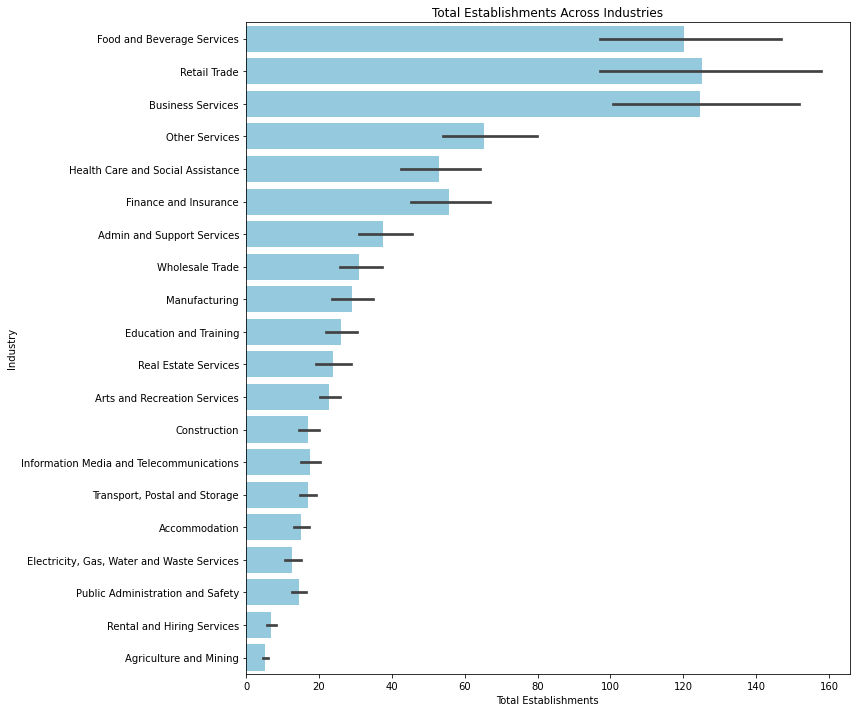

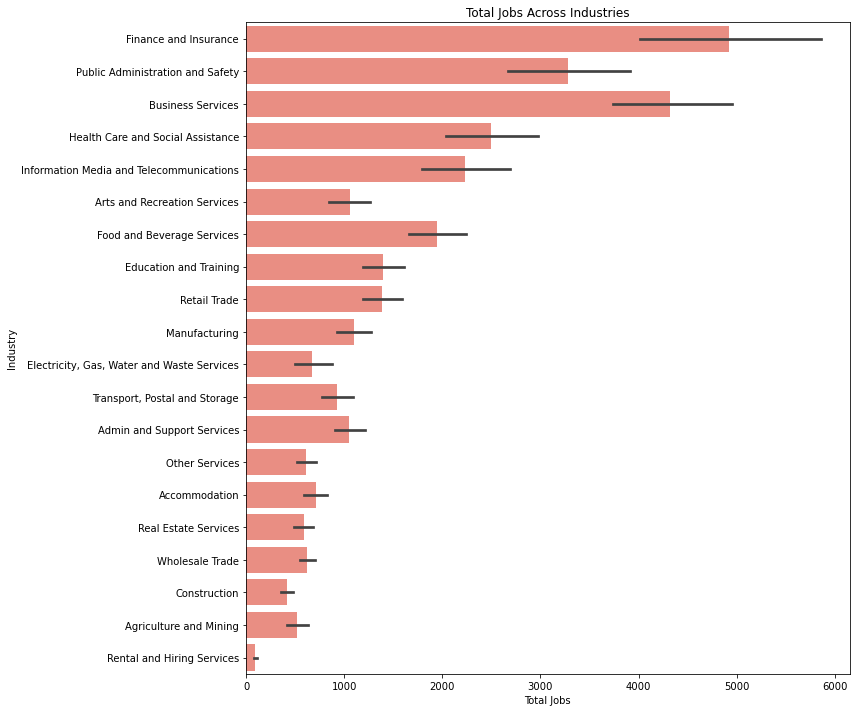

In [20]:
# Sort industries by total jobs 
df_sorted_jobs = buss_est.sort_values(by='total_jobs', ascending=False)
df_sorted_establishments = buss_est.sort_values(by='total_establishments', ascending=False)

df_sorted_jobs = df_sorted_jobs[df_sorted_jobs['clue_industry'] != 'All CLUE Industry']
df_sorted_establishments = df_sorted_establishments[df_sorted_establishments['clue_industry'] != 'All CLUE Industry']

# Visualize total establishments by industry 
plt.figure(figsize=(12, 10))
sns.barplot(x='total_establishments', y='clue_industry', data=df_sorted_establishments, color='skyblue')
plt.xlabel('Total Establishments')
plt.ylabel('Industry')
plt.title('Total Establishments Across Industries')
plt.tight_layout()
plt.show()

# Visualize total jobs by industry 
plt.figure(figsize=(12, 10))
sns.barplot(x='total_jobs', y='clue_industry', data=df_sorted_jobs, color='salmon')
plt.xlabel('Total Jobs')
plt.ylabel('Industry')
plt.title('Total Jobs Across Industries')
plt.tight_layout()
plt.show()

### Dataset 4: Jobs per CLUE industry for blocks


In [21]:
dataset_id_4 = 'employment-by-block-by-clue-industry'
clue_ind = datasetcollect(dataset_id_4)
print(len(clue_ind))


12394


In [22]:
clue_ind.head()

,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2022,4,Melbourne (CBD),0.0,0.0,0.0,362.0,0.0,0.0,NaN,0.0,0.0,205.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,38.0,368.0,0.0,1008.0
1,2022,5,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,6,Melbourne (CBD),0.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,0.0,312.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,47.0,0.0,0.0,647.0
3,2022,13,Melbourne (CBD),NaN,520.0,0.0,NaN,496.0,NaN,NaN,NaN,285.0,12.0,NaN,55.0,NaN,27.0,0.0,0.0,0.0,NaN,NaN,0.0,2379.0
4,2022,16,Melbourne (CBD),NaN,NaN,0.0,86.0,382.0,295.0,NaN,0.0,554.0,447.0,NaN,0.0,0.0,64.0,0.0,NaN,0.0,60.0,0.0,0.0,2404.0


In [23]:
clue_ind.tail()

,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
12389,2009,0,City of Melbourne (total),8287.0,15226.0,3604.0,22828.0,64754.0,4485.0,23212.0,5771.0,61049.0,25685.0,32425.0,34071.0,17081.0,10885.0,38605.0,3287.0,851.0,20690.0,13322.0,9369.0,415487.0
12390,2008,0,City of Melbourne (total),8282.0,15081.0,3855.0,22614.0,65235.0,4075.0,23317.0,5700.0,55815.0,25331.0,31966.0,32280.0,17169.0,10581.0,37676.0,3184.0,751.0,20553.0,14723.0,7592.0,405780.0
12391,2006,0,City of Melbourne (total),8037.0,12690.0,3406.0,23494.0,53429.0,3148.0,21561.0,3467.0,51314.0,23320.0,29160.0,26639.0,15111.0,9622.0,34752.0,2609.0,857.0,19222.0,13140.0,7708.0,362686.0
12392,2004,0,City of Melbourne (total),7201.0,10738.0,3215.0,21252.0,46748.0,2741.0,18170.0,3727.0,46590.0,19037.0,29010.0,24751.0,13959.0,9284.0,31069.0,2286.0,811.0,17428.0,11690.0,7588.0,327295.0
12393,2003,0,City of Melbourne (total),7311.0,10466.0,4474.0,19292.0,48988.0,2306.0,16668.0,2895.0,45340.0,17596.0,28336.0,25481.0,14256.0,9369.0,30424.0,2406.0,1503.0,16728.0,12227.0,7197.0,323263.0


In [24]:
clue_ind.count()

census_year                                 12394
block_id                                    12394
clue_small_area                             12394
accommodation                                9986
admin_and_support_services                  10375
agriculture_and_mining                      11795
arts_and_recreation_services                 8467
business_services                           10519
construction                                10319
education_and_training                       9841
electricity_gas_water_and_waste_services     9926
finance_and_insurance                       10816
food_and_beverage_services                   9766
health_care_and_social_assistance            9834
information_media_and_telecommunications    10096
manufacturing                               10085
other_services                               9114
public_administration_and_safety            10542
real_estate_services                        10603
rental_and_hiring_services                  11534


In [25]:
# Check for missing values
print("Missing values in clue_ind:\n", clue_ind.isnull().sum())


Missing values in clue_ind:
 census_year                                    0
block_id                                       0
clue_small_area                                0
accommodation                               2408
admin_and_support_services                  2019
agriculture_and_mining                       599
arts_and_recreation_services                3927
business_services                           1875
construction                                2075
education_and_training                      2553
electricity_gas_water_and_waste_services    2468
finance_and_insurance                       1578
food_and_beverage_services                  2628
health_care_and_social_assistance           2560
information_media_and_telecommunications    2298
manufacturing                               2309
other_services                              3280
public_administration_and_safety            1852
real_estate_services                        1791
rental_and_hiring_services              

In [26]:
clue_ind.fillna(0, inplace=True)


In [27]:
clue_ind.count()

census_year                                 12394
block_id                                    12394
clue_small_area                             12394
accommodation                               12394
admin_and_support_services                  12394
agriculture_and_mining                      12394
arts_and_recreation_services                12394
business_services                           12394
construction                                12394
education_and_training                      12394
electricity_gas_water_and_waste_services    12394
finance_and_insurance                       12394
food_and_beverage_services                  12394
health_care_and_social_assistance           12394
information_media_and_telecommunications    12394
manufacturing                               12394
other_services                              12394
public_administration_and_safety            12394
real_estate_services                        12394
rental_and_hiring_services                  12394


In [28]:
clue_ind

,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2022,4,Melbourne (CBD),0.0,0.0,0.0,362.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,368.0,0.0,1008.0
1,2022,5,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,6,Melbourne (CBD),0.0,0.0,0.0,203.0,0.0,0.0,0.0,0.0,0.0,312.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,647.0
3,2022,13,Melbourne (CBD),0.0,520.0,0.0,0.0,496.0,0.0,0.0,0.0,285.0,12.0,0.0,55.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,2379.0
4,2022,16,Melbourne (CBD),0.0,0.0,0.0,86.0,382.0,295.0,0.0,0.0,554.0,447.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,60.0,0.0,0.0,2404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2009,0,City of Melbourne (total),8287.0,15226.0,3604.0,22828.0,64754.0,4485.0,23212.0,5771.0,61049.0,25685.0,32425.0,34071.0,17081.0,10885.0,38605.0,3287.0,851.0,20690.0,13322.0,9369.0,415487.0
12390,2008,0,City of Melbourne (total),8282.0,15081.0,3855.0,22614.0,65235.0,4075.0,23317.0,5700.0,55815.0,25331.0,31966.0,32280.0,17169.0,10581.0,37676.0,3184.0,751.0,20553.0,14723.0,7592.0,405780.0
12391,2006,0,City of Melbourne (total),8037.0,12690.0,3406.0,23494.0,53429.0,3148.0,21561.0,3467.0,51314.0,23320.0,29160.0,26639.0,15111.0,9622.0,34752.0,2609.0,857.0,19222.0,13140.0,7708.0,362686.0
12392,2004,0,City of Melbourne (total),7201.0,10738.0,3215.0,21252.0,46748.0,2741.0,18170.0,3727.0,46590.0,19037.0,29010.0,24751.0,13959.0,9284.0,31069.0,2286.0,811.0,17428.0,11690.0,7588.0,327295.0


In [29]:
clue_ind['census_year'] = pd.to_datetime(clue_ind['census_year'], format='%Y')
clue_ind = clue_ind.sort_values('census_year')


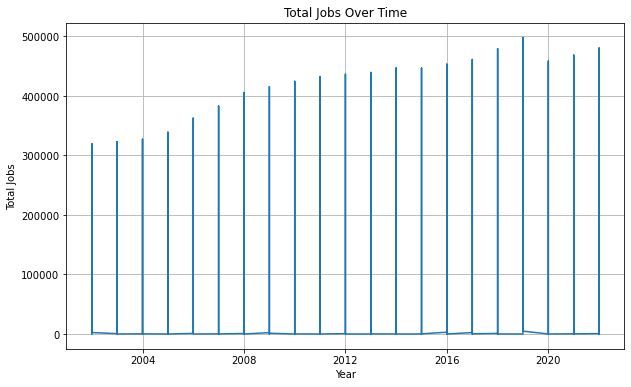

In [30]:

# Plotting total jobs over time
plt.figure(figsize=(10, 6))
plt.plot(clue_ind['census_year'], clue_ind['total_jobs_in_block'])
plt.xlabel('Year')
plt.ylabel('Total Jobs')
plt.title('Total Jobs Over Time')
plt.grid(True)
plt.show()


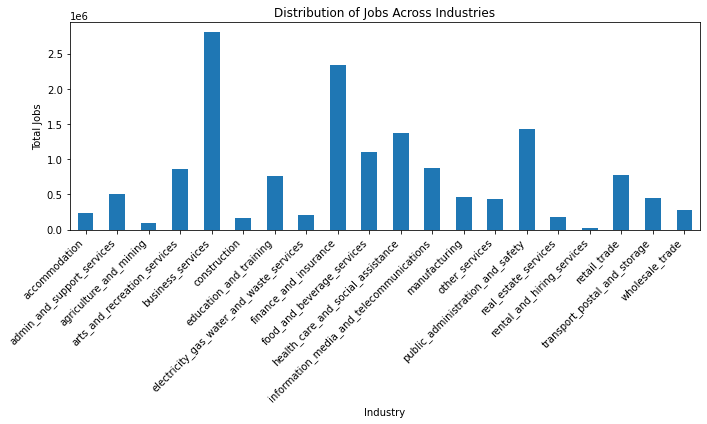

In [31]:
# Create a bar chart for industry distribution
industry_columns = clue_ind.columns[3:-1]  # Exclude non-industry columns
industry_sums = clue_ind[industry_columns].sum()
plt.figure(figsize=(10, 6))
industry_sums.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Jobs')
plt.title('Distribution of Jobs Across Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

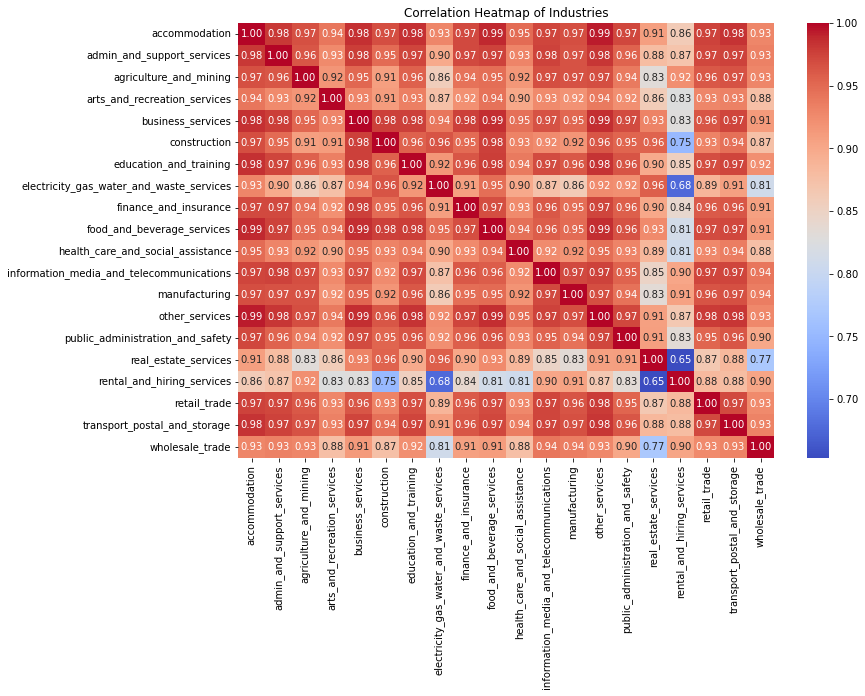

In [32]:

# Compute correlation matrix
corr_matrix = clue_ind[industry_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Industries')
plt.show()


In [33]:
total_blocks = clue_ind['block_id'].unique()
total_blocks

array([ 366,  604,  607,  609,  612,  614,  615,  642,  644,  603,  646,
        655,  720,  729,  731,  734,  740,  745,  748,  651,  750,  602,
        569,  514,  519,  521,  522,  524,  532,  534,  536,  601,  540,
        552,  553,  556,  557,  563,  565,  566,  568,  541,  772,  777,
        780,  924,  925,  926,  928,  931, 1002, 1014, 1109,  923, 1110,
          0, 1111, 1104, 1102, 1016, 1013, 1012, 1009, 1112,  920,  919,
        915,  782,  784,  786,  787,  792,  802,  806,  807,  808,  810,
        811,  813,  851,  852,  857,  860,  861,  903,  913,  509, 1004,
        508,  503,  213,  214,  219,  220,  222,  226,  227,  231,  212,
        236,  239,  246,  248,  252,  253,  257,  259,  260,  237,  261,
        211,  207,   68,   71,   73,   74,   77,   83,   87,   88,  209,
         91,  105,  111,  113,  114,  115,  125,  131,  203,  104,  262,
        263,  274,  373,  375,  402,  404,  406,  409,  411,  415,  369,
        424,  431,  434,  435,  438,  439,  440,  4

As there are many block id, we drop this column and focus on clue small area column to forecast the total job

In [34]:
df = clue_ind.drop('block_id', axis=1)
df.tail()

,census_year,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
4312,2022-01-01,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4109,2022-01-01,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7651,2022-01-01,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7649,2022-01-01,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2022-01-01,Melbourne (CBD),0.0,0.0,0.0,362.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,368.0,0.0,1008.0


In [35]:
area_job_sum = df.groupby('clue_small_area')['total_jobs_in_block'].sum()
area_job_sum

clue_small_area
Carlton                          350122.0
City of Melbourne (total)       8803643.0
Docklands                        857046.0
East Melbourne                   445854.0
Kensington                       118612.0
Melbourne (CBD)                 4444043.0
Melbourne (Remainder)            448115.0
North Melbourne                  180542.0
Parkville                        504094.0
Port Melbourne                   263459.0
South Yarra                       13935.0
Southbank                        783246.0
West Melbourne (Industrial)      117622.0
West Melbourne (Residential)     127419.0
Name: total_jobs_in_block, dtype: float64

In [36]:
df = df.reset_index()


In [37]:
df = df.drop('index', axis=1)

In [38]:
df

,census_year,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2002-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
1,2002-01-01,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-01-01,East Melbourne,0.0,50.0,0.0,0.0,119.0,0.0,0.0,0.0,0.0,26.0,103.0,0.0,0.0,0.0,0.0,29.0,0.0,14.0,0.0,0.0,986.0
3,2002-01-01,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-01-01,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2022-01-01,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12390,2022-01-01,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12391,2022-01-01,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12392,2022-01-01,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
grouped_data = df.groupby(['census_year', 'clue_small_area']).sum()
grouped_data

accommodation  \
census_year clue_small_area                               
2002-01-01  Carlton                                66.0   
            City of Melbourne (total)            7265.0   
            Docklands                               0.0   
            East Melbourne                        129.0   
            Kensington                              0.0   
...                                                 ...   
2022-01-01  Port Melbourne                          0.0   
            South Yarra                             0.0   
            Southbank                             115.0   
            West Melbourne (Industrial)             0.0   
            West Melbourne (Residential)            0.0   

                                          admin_and_support_services  \
census_year clue_small_area                                            
2002-01-01  Carlton                                             71.0   
            City of Melbourne (total)                        10621.0   
            Docklands                                          476.0   
            East Melbourne                                     148.0   
            Kensington                                           0.0   
...                                                              ...   
2022-01-01  Port Melbourne                                     486.0   
            South Yarra                                          0.0   
            Southbank                                         1075.0   
            West Melbourne (Industrial)                          0.0   
            West Melbourne (Residential)                         0.0   

                                          agriculture_and_mining  \
census_year clue_small_area                                        
2002-01-01  Carlton                                          0.0   
            City of Melbourne (total)                     4483.0   
            Docklands                                        0.0   
            East Melbourne                                   0.0   
            Kensington                                       0.0   
...                                                          ...   
2022-01-01  Port Melbourne                                   0.0   
            South Yarra                                      0.0   
            Southbank                                        0.0   
            West Melbourne (Industrial)                      0.0   
            West Melbourne (Residential)                     0.0   

                                          arts_and_recreation_services  \
census_year clue_small_area                                              
2002-01-01  Carlton                                                7.0   
            City of Melbourne (total)                          18913.0   
            Docklands                                            667.0   
            East Melbourne                                      1566.0   
            Kensington                                             2.0   
...                                                                ...   
2022-01-01  Port Melbourne                                         7.0   
            South Yarra                                            7.0   
            Southbank                                           9595.0   
            West Melbourne (Industrial)                            0.0   
            West Melbourne (Residential)                          15.0   

                                          business_services  construction  \
census_year clue_small_area                                                 
2002-01-01  Carlton                                  1256.0           0.0   
            City of Melbourne (total)               48302.0        2548.0   
            Docklands                                  26.0          23.0   
            East Melbourne                            952.0           0.0   
            Kensington     

In [40]:
grouped_data.reset_index(inplace=True)
grouped_data

,census_year,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2002-01-01,Carlton,66.0,71.0,0.0,7.0,1256.0,0.0,1268.0,0.0,213.0,1237.0,3063.0,0.0,43.0,1045.0,0.0,0.0,0.0,1095.0,0.0,0.0,15452.0
1,2002-01-01,City of Melbourne (total),7265.0,10621.0,4483.0,18913.0,48302.0,2548.0,15806.0,3022.0,44975.0,17145.0,27482.0,25083.0,14638.0,8994.0,30233.0,2352.0,1385.0,16973.0,12900.0,6609.0,319729.0
2,2002-01-01,Docklands,0.0,476.0,0.0,667.0,26.0,23.0,0.0,0.0,0.0,719.0,0.0,0.0,0.0,28.0,2980.0,24.0,0.0,18.0,793.0,0.0,6781.0
3,2002-01-01,East Melbourne,129.0,148.0,0.0,1566.0,952.0,0.0,218.0,0.0,1533.0,78.0,3490.0,0.0,0.0,311.0,3101.0,29.0,0.0,14.0,0.0,0.0,19548.0
4,2002-01-01,Kensington,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,242.0,14.0,0.0,0.0,0.0,0.0,0.0,145.0,2834.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2022-01-01,Port Melbourne,0.0,486.0,0.0,7.0,1158.0,980.0,15.0,11.0,0.0,16.0,0.0,179.0,3552.0,124.0,90.0,0.0,71.0,213.0,1110.0,816.0,12737.0
290,2022-01-01,South Yarra,0.0,0.0,0.0,7.0,0.0,0.0,40.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,933.0
291,2022-01-01,Southbank,115.0,1075.0,0.0,9595.0,7139.0,658.0,386.0,200.0,797.0,3431.0,290.0,662.0,2763.0,496.0,0.0,112.0,0.0,1832.0,283.0,492.0,42423.0
292,2022-01-01,West Melbourne (Industrial),0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,67.0,2596.0,447.0,3770.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [42]:
df_filtered = grouped_data[['census_year', 'clue_small_area', 'total_jobs_in_block']]
df_filtered

,census_year,clue_small_area,total_jobs_in_block
0,2002-01-01,Carlton,15452.0
1,2002-01-01,City of Melbourne (total),319729.0
2,2002-01-01,Docklands,6781.0
3,2002-01-01,East Melbourne,19548.0
4,2002-01-01,Kensington,2834.0
...,...,...,...
289,2022-01-01,Port Melbourne,12737.0
290,2022-01-01,South Yarra,933.0
291,2022-01-01,Southbank,42423.0
292,2022-01-01,West Melbourne (Industrial),3770.0


In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_filtered['clue_small_area_encoded'] = label_encoder.fit_transform(df_filtered['clue_small_area'])
df_filtered

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded
0,2002-01-01,Carlton,15452.0,0
1,2002-01-01,City of Melbourne (total),319729.0,1
2,2002-01-01,Docklands,6781.0,2
3,2002-01-01,East Melbourne,19548.0,3
4,2002-01-01,Kensington,2834.0,4
...,...,...,...,...
289,2022-01-01,Port Melbourne,12737.0,9
290,2022-01-01,South Yarra,933.0,10
291,2022-01-01,Southbank,42423.0,11
292,2022-01-01,West Melbourne (Industrial),3770.0,12


In [44]:
df_filtered[df_filtered['census_year'] == "2002-01-01"]

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded
0,2002-01-01,Carlton,15452.0,0
1,2002-01-01,City of Melbourne (total),319729.0,1
2,2002-01-01,Docklands,6781.0,2
3,2002-01-01,East Melbourne,19548.0,3
4,2002-01-01,Kensington,2834.0,4
5,2002-01-01,Melbourne (CBD),175912.0,5
6,2002-01-01,Melbourne (Remainder),15303.0,6
7,2002-01-01,North Melbourne,7106.0,7
8,2002-01-01,Parkville,15614.0,8
9,2002-01-01,Port Melbourne,10285.0,9


In [45]:
df_filtered['census_year'] = df_filtered['census_year'].dt.year


In [46]:
df_filtered['census_year']

0      2002
1      2002
2      2002
3      2002
4      2002
       ... 
289    2022
290    2022
291    2022
292    2022
293    2022
Name: census_year, Length: 294, dtype: int64

In [47]:
# Split the data into training and testing sets
X = df_filtered[['census_year', 'clue_small_area_encoded']]
y = df_filtered['total_jobs_in_block']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
y_train

181      4993.0
209      5018.0
168     16224.0
6       15303.0
224     17037.0
         ...   
188     23091.0
71     383135.0
106     21590.0
270      7261.0
102      4739.0
Name: total_jobs_in_block, Length: 235, dtype: float64

In [49]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 7869948981.435795
R-squared Score: 0.029429279760268545


In [51]:
y_pred

array([ 73037.50924698,  19753.61193743,  69300.23606824, 131604.08740005,
        40048.50848751, -22255.3428443 ,  14888.84450591,  22781.30427538,
         2131.61730491, 137951.13950475, -12880.59840165,  86922.23070076,
        19398.82151703, 139078.63375754,  92559.70196467, 139851.33758992,
       100806.95215454, 110954.40042958, 151481.07053814,  70782.52074142,
        66690.45714228,  26163.78703373,  36666.02572916, 130831.38356767,
        79447.68434328,  64790.25905711,  88049.72495355,  -4988.13863218,
        41176.00274029,  25391.08320134,  61052.98587837, 144716.10502145,
         1776.82688451,  56543.00886724,  99679.45790176,  -9498.11564331,
        49778.04335055,  49423.25293016,   4031.81539008,  16789.04259107,
       141333.6222631 ,  80575.17859606,  -4633.34821178,  76419.99200533,
        15661.54833829,  84312.4517748 ,   2904.32113729, -16617.87158039,
       111309.19084998,  33638.33339121, 102707.15023971,   8123.87898922,
       146971.09352701,  

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared Score: {r2_rf}")

Random Forest Mean Squared Error: 4769625.152377971
Random Forest R-squared Score: 0.9994117803647347


In [53]:
df_2023 = pd.DataFrame({'census_year': [2023] * len(df_filtered['clue_small_area_encoded'].unique())})
df_2023['clue_small_area_encoded'] = df_filtered['clue_small_area_encoded'].unique()
predictions_2023_rf = rf_model.predict(df_2023[['census_year', 'clue_small_area_encoded']])
df_2023['predicted_total_jobs_2023_rf'] = predictions_2023_rf

# Display predicted total jobs for 2023 in different areas using the best model
round(df_2023[['clue_small_area_encoded', 'predicted_total_jobs_2023_rf']])

,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,0,14914.0
1,1,477289.0
2,2,73064.0
3,3,20706.0
4,4,7317.0
5,5,225878.0
6,6,23069.0
7,7,10197.0
8,8,33101.0
9,9,14896.0


In [54]:
# Merge predictions with the actual data for visualization
df_plot = pd.concat([df_filtered, df_2023])
df_plot

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,2002,Carlton,15452.0,0,NaN
1,2002,City of Melbourne (total),319729.0,1,NaN
2,2002,Docklands,6781.0,2,NaN
3,2002,East Melbourne,19548.0,3,NaN
4,2002,Kensington,2834.0,4,NaN
...,...,...,...,...,...
9,2023,NaN,NaN,9,14895.51
10,2023,NaN,NaN,10,921.24
11,2023,NaN,NaN,11,42516.96
12,2023,NaN,NaN,12,2763.86


In [55]:
df_plot['clue_small_area_encoded'] = label_encoder.inverse_transform(df_plot['clue_small_area_encoded'])
df_plot

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,2002,Carlton,15452.0,Carlton,NaN
1,2002,City of Melbourne (total),319729.0,City of Melbourne (total),NaN
2,2002,Docklands,6781.0,Docklands,NaN
3,2002,East Melbourne,19548.0,East Melbourne,NaN
4,2002,Kensington,2834.0,Kensington,NaN
...,...,...,...,...,...
9,2023,NaN,NaN,Port Melbourne,14895.51
10,2023,NaN,NaN,South Yarra,921.24
11,2023,NaN,NaN,Southbank,42516.96
12,2023,NaN,NaN,West Melbourne (Industrial),2763.86


In [56]:
# Move predicted_total_jobs_2023_rf values to total_jobs_in_block for census year 2023
df_plot.loc[df_plot['census_year'] == 2023, 'total_jobs_in_block'] = df_plot.loc[df_plot['census_year'] == 2023, 'predicted_total_jobs_2023_rf']
df_plot

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,2002,Carlton,15452.00,Carlton,NaN
1,2002,City of Melbourne (total),319729.00,City of Melbourne (total),NaN
2,2002,Docklands,6781.00,Docklands,NaN
3,2002,East Melbourne,19548.00,East Melbourne,NaN
4,2002,Kensington,2834.00,Kensington,NaN
...,...,...,...,...,...
9,2023,NaN,14895.51,Port Melbourne,14895.51
10,2023,NaN,921.24,South Yarra,921.24
11,2023,NaN,42516.96,Southbank,42516.96
12,2023,NaN,2763.86,West Melbourne (Industrial),2763.86


In [57]:
df_plot = df_plot.drop(['clue_small_area','predicted_total_jobs_2023_rf'], axis=1)
df_plot

,census_year,total_jobs_in_block,clue_small_area_encoded
0,2002,15452.00,Carlton
1,2002,319729.00,City of Melbourne (total)
2,2002,6781.00,Docklands
3,2002,19548.00,East Melbourne
4,2002,2834.00,Kensington
...,...,...,...
9,2023,14895.51,Port Melbourne
10,2023,921.24,South Yarra
11,2023,42516.96,Southbank
12,2023,2763.86,West Melbourne (Industrial)


In [58]:
from geopy.geocoders import Nominatim


In [59]:
geolocator = Nominatim(user_agent="my_geocoder")


In [60]:
# Initialize empty lists to store latitudes and longitudes
latitudes = []
longitudes = []

# Iterate over DataFrame rows and geocode locations
for index, row in df_plot.iterrows():
    location = geolocator.geocode(row['clue_small_area_encoded'] + ", Melbourne, Australia")
    if location:
        lat = location.latitude
        lon = location.longitude
        latitudes.append(lat)
        longitudes.append(lon)
        print(f"Location: {row['clue_small_area_encoded']} | Lat: {lat} | Lon: {lon}")
    else:
        latitudes.append(None)
        longitudes.append(None)
        print(f"Location {row['clue_small_area_encoded']} not found.")



Location: Carlton | Lat: -37.8004228 | Lon: 144.9684343
Location City of Melbourne (total) not found.
Location: Docklands | Lat: -37.8175423 | Lon: 144.9394923
Location: East Melbourne | Lat: -37.812498 | Lon: 144.9858851
Location: Kensington | Lat: -37.7939378 | Lon: 144.9305645
Location: Melbourne (CBD) | Lat: -37.8141705 | Lon: 144.9655616
Location Melbourne (Remainder) not found.
Location: North Melbourne | Lat: -37.8076092 | Lon: 144.9423514
Location: Parkville | Lat: -37.7871148 | Lon: 144.9515533
Location: Port Melbourne | Lat: -37.8333613 | Lon: 144.9219203
Location: South Yarra | Lat: -37.8377695 | Lon: 144.9918537
Location: Southbank | Lat: -37.8253618 | Lon: 144.9640203
Location: West Melbourne (Industrial) | Lat: -37.8083671 | Lon: 144.81306234897477
Location West Melbourne (Residential) not found.
Location: Carlton | Lat: -37.8004228 | Lon: 144.9684343
Location City of Melbourne (total) not found.
Location: Docklands | Lat: -37.8175423 | Lon: 144.9394923
Location: East Mel

In [61]:
# Add latitudes and longitudes to DataFrame
df_plot['lat'] = latitudes
df_plot['lon'] = longitudes
df_plot

,census_year,total_jobs_in_block,clue_small_area_encoded,lat,lon
0,2002,15452.00,Carlton,-37.800423,144.968434
1,2002,319729.00,City of Melbourne (total),NaN,NaN
2,2002,6781.00,Docklands,-37.817542,144.939492
3,2002,19548.00,East Melbourne,-37.812498,144.985885
4,2002,2834.00,Kensington,-37.793938,144.930565
...,...,...,...,...,...
9,2023,14895.51,Port Melbourne,-37.833361,144.921920
10,2023,921.24,South Yarra,-37.837770,144.991854
11,2023,42516.96,Southbank,-37.825362,144.964020
12,2023,2763.86,West Melbourne (Industrial),-37.808367,144.813062


In [62]:
df_plot = df_plot.dropna(subset=['lat', 'lon'])
df_plot

,census_year,total_jobs_in_block,clue_small_area_encoded,lat,lon
0,2002,15452.00,Carlton,-37.800423,144.968434
2,2002,6781.00,Docklands,-37.817542,144.939492
3,2002,19548.00,East Melbourne,-37.812498,144.985885
4,2002,2834.00,Kensington,-37.793938,144.930565
5,2002,175912.00,Melbourne (CBD),-37.814171,144.965562
...,...,...,...,...,...
8,2023,33101.29,Parkville,-37.787115,144.951553
9,2023,14895.51,Port Melbourne,-37.833361,144.921920
10,2023,921.24,South Yarra,-37.837770,144.991854
11,2023,42516.96,Southbank,-37.825362,144.964020


In [63]:
df_2023 = df_plot[df_plot['census_year'] == 2023]
df_2023

,census_year,total_jobs_in_block,clue_small_area_encoded,lat,lon
0,2023,14914.24,Carlton,-37.800423,144.968434
2,2023,73064.34,Docklands,-37.817542,144.939492
3,2023,20705.92,East Melbourne,-37.812498,144.985885
4,2023,7317.46,Kensington,-37.793938,144.930565
5,2023,225878.39,Melbourne (CBD),-37.814171,144.965562
7,2023,10196.51,North Melbourne,-37.807609,144.942351
8,2023,33101.29,Parkville,-37.787115,144.951553
9,2023,14895.51,Port Melbourne,-37.833361,144.921920
10,2023,921.24,South Yarra,-37.837770,144.991854
11,2023,42516.96,Southbank,-37.825362,144.964020


In [79]:
import folium
from folium.plugins import MarkerCluster, Search

# Create a map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
marker_cluster = MarkerCluster().add_to(melbourne_map)

# Add markers for each location with total jobs information in popup
for index, row in df_2023.iterrows():
    radius = row['total_jobs_in_block'] / 3000  # Adjust scaling factor as needed
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['clue_small_area_encoded']}<br>Total Jobs: {row['total_jobs_in_block']}"
    ).add_to(melbourne_map)
folium.LayerControl().add_to(melbourne_map)



melbourne_map.get_root().html.add_child(folium.Element(dropdown_html + dropdown_script))
# Display the map
melbourne_map.save('melbourne_map_total_jobs.html')

In [78]:
melbourne_map